In [2]:
!pip install plotly
!pip install wordcloud
!pip install chart_studio


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\bcamaster\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\bcamaster\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\bcamaster\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Import Plotly

In [3]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px

# to export plot to chart studio
# username = ''
# api_key = ''

# chart_studio.tools.set_credentials_file(username = username, api_key = api_key)


### Side Hustles

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATHNAME = 'data'
%matplotlib inline

In [5]:
data_side_hustles = list(os.walk(f'{PATHNAME}/'))[0][1]
data_side_hustles

['App and Platform Testing',
 'Babysitting and Child Care',
 'Blogging',
 'Car Washing Services',
 'Create a Podcast',
 'Digital Product Sales',
 'Dog Walking',
 'Dropshipping Business',
 'Elderly Care',
 'Exclusive Product Sales',
 'Freelancing',
 'Influencer Marketing',
 'Local Handyman',
 'Local Sales',
 'Local Selling',
 'Mobile Car Wash and Detailing',
 'Online Courses and Coaching',
 'Personal Assistant',
 'Pet Daycare Services',
 'Retail arbitrage products',
 'Sell Private Label Products',
 'Selling at local markets',
 'Take Online Surveys',
 'Tutoring and Instruction',
 'Viral Social Media Content',
 'Virtual Assistant',
 'YouTube Channel']

In [6]:
(pd.read_csv("data/YouTube Channel/interest_by_region.csv"))

,geoName,YouTube Channel
0,Argentina,2
1,Australia,22
2,Austria,5
3,Bangladesh,75
4,Belgium,5
...,...,...
56,Ukraine,2
57,United Arab Emirates,39
58,United Kingdom,21
59,United States,27


### Count Region of each Side Hustle

In [7]:
def countRegion(path):
    side_hustle = list()
    data_count = list()
    for sh in data_side_hustles:
        df = pd.read_csv(f'{PATHNAME}/{sh}/interest_by_region.csv')
        count = len(df)
        side_hustle.append(df.columns[1])
        data_count.append(count)
    return pd.DataFrame(list(zip(side_hustle, data_count)),
               columns =['Side Hustle', 'Total Region']),data_count
    # return side_hustle, data_count

In [8]:
side_hustles, data_count = countRegion('interest_by_region')
side_hustles

,Side Hustle,Total Region
0,App and Platform Testing,1
1,Babysitting and Child Care,1
2,Blogging,55
3,Car Washing Services,3
4,Create a Podcast,8
5,Digital Product Sales,3
6,Dog Walking,33
7,Dropshipping Business,49
8,Elderly Care,51
9,Exclusive Product Sales,1


### Filter Side Hustle that consist of 25 Region or More

In [9]:
# Select data that have more than or equal to 25 geoName
def countRegionFilter(path, min):
    side_hustle = list()
    data_count = list()
    for sh in data_side_hustles:
        df = pd.read_csv(f'{PATHNAME}/{sh}/interest_by_region.csv')
        count = len(df)
        if count >= min:
            side_hustle.append(df.columns[1])
            data_count.append(count)
    # return pd.DataFrame(list(zip(side_hustle, data_count)),
    #            columns =['Side Hustle', 'Total Region']),data_count
    return side_hustle, data_count

In [10]:
side_hustles, data_count = countRegionFilter('interest_by_region', 25)
pd.DataFrame(list(zip(side_hustles, data_count)), columns =['Side Hustle', 'Total Region'])

,Side Hustle,Total Region
0,Blogging,55
1,Dog Walking,33
2,Dropshipping Business,49
3,Elderly Care,51
4,Freelancing,37
5,Influencer Marketing,70
6,Local Sales,25
7,Personal Assistant,56
8,Virtual Assistant,59
9,YouTube Channel,61


In [11]:
pd.DataFrame(list(zip(side_hustles, data_count)), columns =['Side Hustle', 'Total Region'])

,Side Hustle,Total Region
0,Blogging,55
1,Dog Walking,33
2,Dropshipping Business,49
3,Elderly Care,51
4,Freelancing,37
5,Influencer Marketing,70
6,Local Sales,25
7,Personal Assistant,56
8,Virtual Assistant,59
9,YouTube Channel,61


### Helper Function

In [12]:
# Region, Time
pd.reset_option('.max_rows')
# pd.set_option('display.max_rows', None)
def get_helper(path):
    data_df = list()
    
    for sh in side_hustles:
        df = pd.read_csv(f'{PATHNAME}/{sh}/{path}.csv')
        df = df.iloc[:,:2]
        if path == 'interest_by_region':
            df.columns=['geoName', 'interest']
        else:
            df.columns=['date', 'interest']
        df['side_hustle'] = sh
        
        data_df.append(df)
        
    return pd.concat(data_df)

# Queries, Topics
def get_helper2(path):
    data_df = list()
    
    for sh in side_hustles:
        df = pd.read_csv(f'{PATHNAME}/{sh}/{path}.csv', index_col=0)
        df['side_hustle'] = sh
        
        data_df.append(df)
        
    return pd.concat(data_df)

# Interest By Region

In [13]:
region_df = get_helper('interest_by_region')
region_df

,geoName,interest,side_hustle
0,Argentina,2,Blogging
1,Australia,12,Blogging
2,Bangladesh,42,Blogging
3,Belgium,2,Blogging
4,Brazil,1,Blogging
...,...,...,...
56,Ukraine,2,YouTube Channel
57,United Arab Emirates,39,YouTube Channel
58,United Kingdom,21,YouTube Channel
59,United States,27,YouTube Channel


In [14]:
import plotly.express as px

def plot_regionwise(hustle):
    fig = px.choropleth(
        region_df[region_df.side_hustle == hustle],
        locations='geoName',
        locationmode='country names',
        color='interest',
        hover_name='geoName',
        projection='natural earth'
    )

    fig.update_layout(
        title=f'Interest in {hustle} by Country',
        geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
        coloraxis_colorbar=dict(title='Interest')
    )

    fig.show()
    # fig.write_html("Interest in " + hustle + " by Country.html", auto_open=True)
    # py.plot(fig, filename="Interest in " + hustle + " by Country", auto_open = True)
    

In [15]:
for hustle in side_hustles:
    plot_regionwise(hustle)

# Interest Over Time

In [16]:
pd.reset_option('.max_rows')
# pd.set_option('display.max_rows', None)
time_df = get_helper('interest_over_time')
time_df

,date,interest,side_hustle
0,2018-06-10,60,Blogging
1,2018-06-17,61,Blogging
2,2018-06-24,65,Blogging
3,2018-07-01,61,Blogging
4,2018-07-08,69,Blogging
...,...,...,...
256,2023-05-07,74,YouTube Channel
257,2023-05-14,72,YouTube Channel
258,2023-05-21,76,YouTube Channel
259,2023-05-28,76,YouTube Channel


In [17]:
def min_max_interest(hustle):
    df = time_df.copy()
    df = df[df['side_hustle'] ==  hustle]
    idxmin = df['interest'].idxmin()
    idxmax = df['interest'].idxmax()
    print(df.iloc[idxmin]['side_hustle'], '\n',
          'min interest',  df.iloc[idxmin]['interest'], ' - ', df.iloc[idxmin]['date'], '\n',
          'max interest',  df.iloc[idxmax]['interest'], ' - ', df.iloc[idxmax]['date'], '\n')

In [18]:
for hustle in side_hustles:
    min_max_interest(hustle)

Blogging 
 min interest 60  -  2018-06-10 
 max interest 100  -  2020-07-19 

Dog Walking 
 min interest 44  -  2021-12-19 
 max interest 100  -  2020-03-22 

Dropshipping Business 
 min interest 9  -  2019-07-21 
 max interest 100  -  2023-01-01 

Elderly Care 
 min interest 41  -  2021-12-19 
 max interest 100  -  2020-03-15 

Freelancing 
 min interest 20  -  2018-12-02 
 max interest 100  -  2023-06-04 

Influencer Marketing 
 min interest 30  -  2018-12-23 
 max interest 100  -  2020-05-24 

Local Sales 
 min interest 28  -  2022-12-25 
 max interest 100  -  2022-04-10 

Personal Assistant 
 min interest 39  -  2021-12-19 
 max interest 100  -  2019-08-25 

Virtual Assistant 
 min interest 3  -  2018-11-18 
 max interest 100  -  2021-05-30 

YouTube Channel 
 min interest 37  -  2018-06-17 
 max interest 100  -  2020-05-10 



### Add Attribute to Show Smoothed Value of a Data Point with 4 Window Size

In [19]:
pd.reset_option('.max_rows')
# pd.set_option('display.max_rows', None)
time_df2 = time_df.copy()
time_df2['smoothed'] = time_df2['interest'].rolling(window=4, min_periods=1).mean()
time_df2

,date,interest,side_hustle,smoothed
0,2018-06-10,60,Blogging,60.00
1,2018-06-17,61,Blogging,60.50
2,2018-06-24,65,Blogging,62.00
3,2018-07-01,61,Blogging,61.75
4,2018-07-08,69,Blogging,64.00
...,...,...,...,...
256,2023-05-07,74,YouTube Channel,74.25
257,2023-05-14,72,YouTube Channel,73.75
258,2023-05-21,76,YouTube Channel,74.00
259,2023-05-28,76,YouTube Channel,74.50


### Add Attribute to Show the interval of the Smoothed Value

In [20]:
df = time_df.copy()
df = df[df['side_hustle'] == 'Blogging']
df['smoothed'] = df['interest'].rolling(window=4, min_periods=1).mean()
df['date'] = pd.to_datetime(df['date']).dt.date
for i in range(3, len(df)):
    df.loc[i, 'interval'] = f"{df['date'].iloc[i-3]} - {df['date'].iloc[i]}"
df

,date,interest,side_hustle,smoothed,interval
0,2018-06-10,60,Blogging,60.00,NaN
1,2018-06-17,61,Blogging,60.50,NaN
2,2018-06-24,65,Blogging,62.00,NaN
3,2018-07-01,61,Blogging,61.75,2018-06-10 - 2018-07-01
4,2018-07-08,69,Blogging,64.00,2018-06-17 - 2018-07-08
...,...,...,...,...,...
256,2023-05-07,70,Blogging,73.75,2023-04-16 - 2023-05-07
257,2023-05-14,71,Blogging,73.50,2023-04-23 - 2023-05-14
258,2023-05-21,78,Blogging,73.75,2023-04-30 - 2023-05-21
259,2023-05-28,73,Blogging,73.00,2023-05-07 - 2023-05-28


### Display All Side Hustles Interest Rate

In [21]:
import plotly.graph_objects as go
def plot_interest_rate_unique(window_):
    df2 = time_df.copy()
    df2['smoothed'] = df2['interest'].rolling(window=window_, min_periods=1).mean()

    df2['date'] = pd.to_datetime(df2['date']).dt.date
    for i in range(3, len(df2)):
        df2.loc[i, 'interval'] = f"{df2['date'].iloc[i-3]} - {df2['date'].iloc[i]}"

    fig = go.Figure()
    unique_side_hustles = df2['side_hustle'].unique()
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black']  # Customize colors if needed
    for i, side_hustle in enumerate(unique_side_hustles):
        subset = df2[df2['side_hustle'] == side_hustle]
        
        # Cut out the first 3 values for each category
        if window_ > 1:
            subset = subset.groupby('side_hustle', group_keys=True).apply(lambda x: x.iloc[window_-1:]).reset_index(drop=True)
        
        fig.add_trace(go.Scatter(
            x=subset['interval'],
            y=subset['smoothed'],
            mode='lines',
            name=side_hustle,
            line=dict(color=colors[i])
        ))
    fig.update_layout(
        title='Interest Rate with Time for Side Hustles',
        xaxis_title='Date Interval',
        yaxis_title='Interest Rate'
    )
    fig.show()
    
    # fig.write_html("All Interest Rate based on Interval (8 Window Smooting).html", auto_open=True)
    # py.plot(fig, filename="All Interest Rate based on Interval (8 Window Smooting)", auto_open = True)

##### Interest Rate without Smoothing

In [22]:
plot_interest_rate_unique(1)

##### Smoothing with 4 Window Size

In [23]:
plot_interest_rate_unique(4)

##### Smoothing with 8 Window Size

In [24]:
plot_interest_rate_unique(8)

##### Smoothing with 16 Window Size

In [25]:
plot_interest_rate_unique(16)

### Display Side Hustles Interest Rate By Category

In [29]:
import plotly.graph_objects as go
def plot_interest_rate(df, hustle, window_):
    fig = go.Figure()
    
    subset = df[df['side_hustle'] == hustle].groupby('side_hustle').apply(lambda x: x[window_-1:]).reset_index(drop=True)
    for i in range(3, len(subset)):
        subset.loc[i, 'interval'] = f"{subset['date'].iloc[i-3]} - {subset['date'].iloc[i]}"
    
    fig.add_trace(go.Scatter(
        x=subset['interval'],
        y=subset['smoothed'],
        mode='lines',
        name='side_hustle',
        line=dict(color='blue')
    ))
    
    fig.update_layout(
    title='Interest Rate with Time for ' + hustle,
    xaxis_title='Year',
    yaxis_title='Interest Rate'
    )

    fig.show()
    # fig.write_html("Interest Rate with Time for " + hustle + ".html", auto_open=True)
    # py.plot(fig, filename="Interest Rate with Time for " + hustle, auto_open = True)
    

In [30]:
window_ = 8
unique_side_hustles = time_df['side_hustle'].unique()
df = time_df.copy()
df['smoothed'] = df['interest'].rolling(window=window_, min_periods=1).mean()
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime(df['date']).dt.date

for hustle in unique_side_hustles:
    plot_interest_rate(df, hustle, window_)

# Related Queries

In [31]:
queries_df = get_helper2('related_queries')
queries_df

,query,value,mode,side_hustle
0,ira blogging marathi,31050,rising,Blogging
1,dragon blogger technology gadgets video games ...,21800,rising,Blogging
2,ira blogging bandhan,20100,rising,Blogging
3,ira blogging,15900,rising,Blogging
4,blogging meaning in marathi,10500,rising,Blogging
...,...,...,...,...
45,youtube channel logo,27,top,YouTube Channel
46,channel art,27,top,YouTube Channel
47,youtube channels,27,top,YouTube Channel
48,youtube download,27,top,YouTube Channel


In [32]:
from wordcloud import WordCloud

def show_wordcloud(hustle):
    queries_list = queries_df[queries_df.side_hustle == hustle]['query'].unique()
    text = ' '.join(queries_list).lower()
    wordcloud = WordCloud(width=800, height=400).generate(text)


    
    plt.figure(figsize=(10, 6))
    plt.title(hustle)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

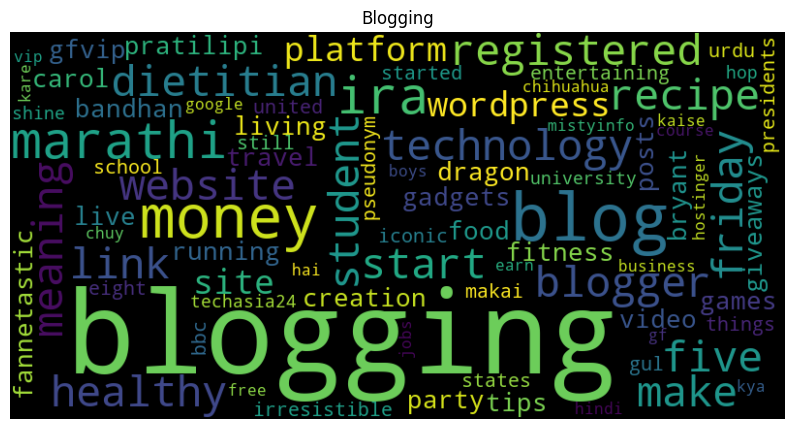

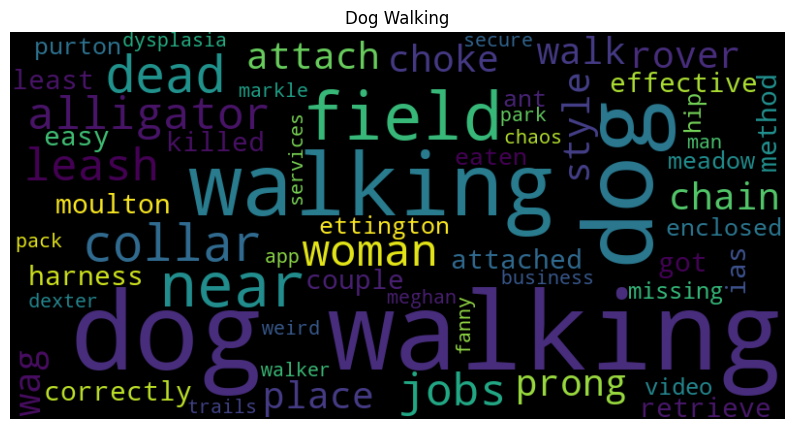

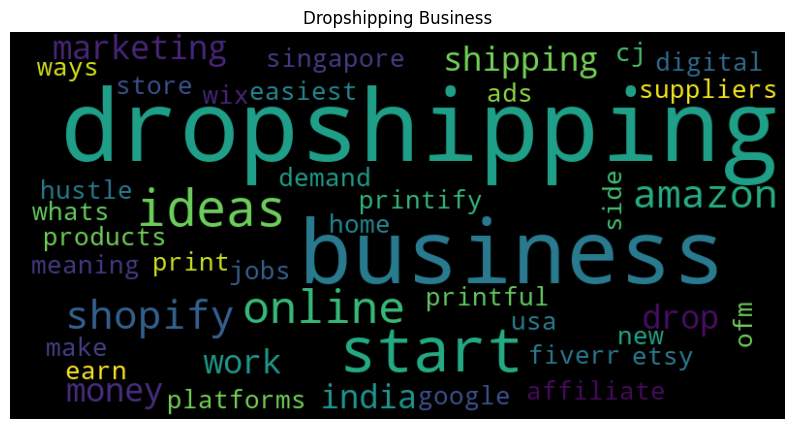

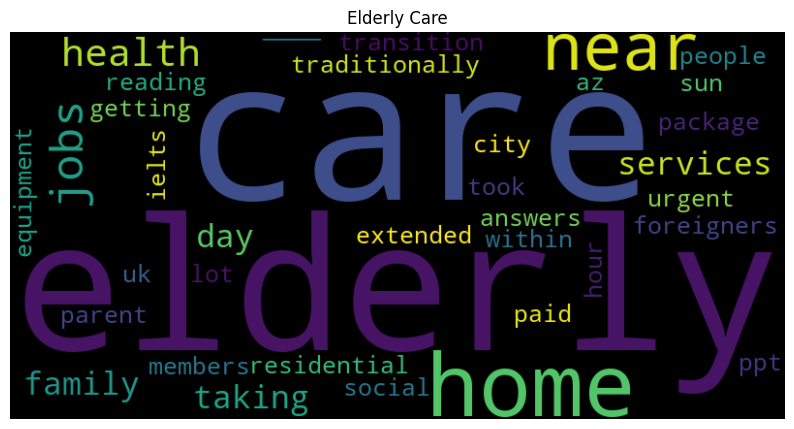

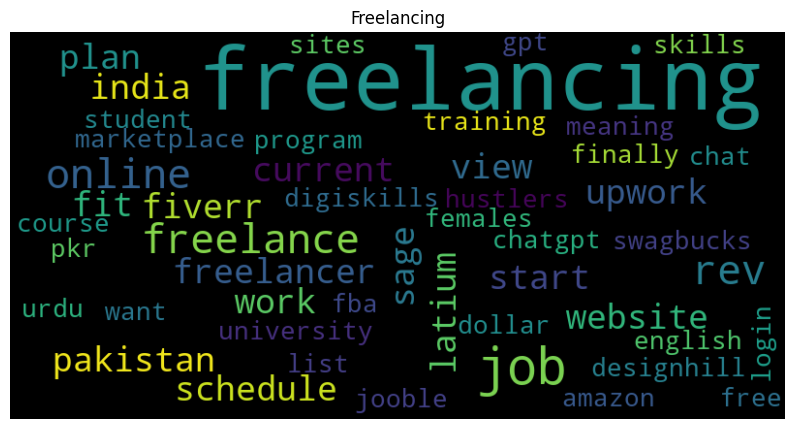

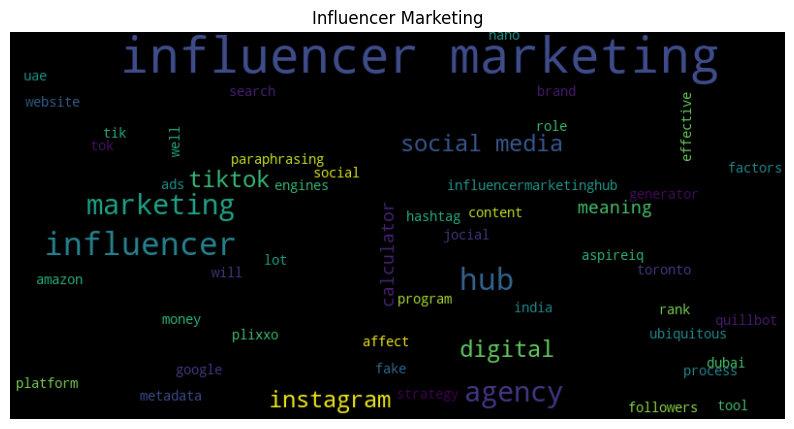

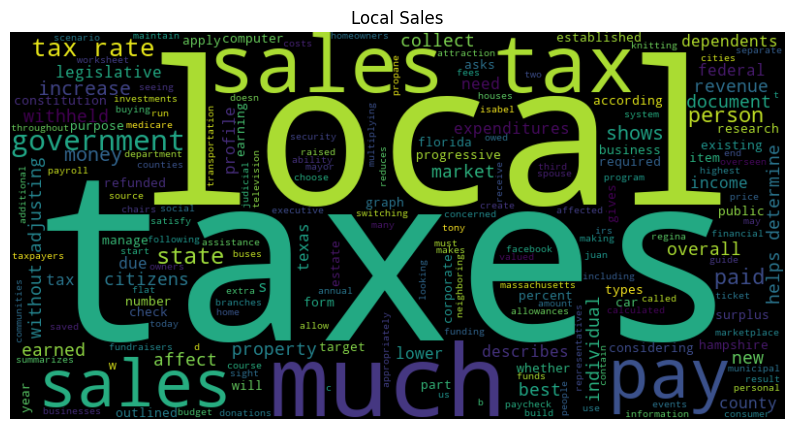

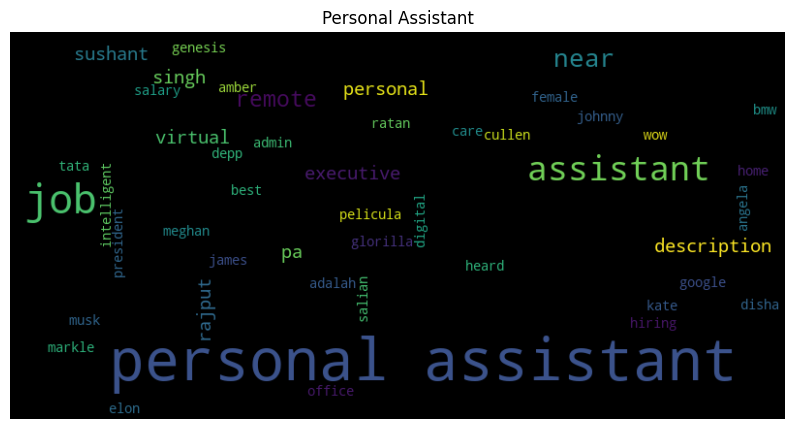

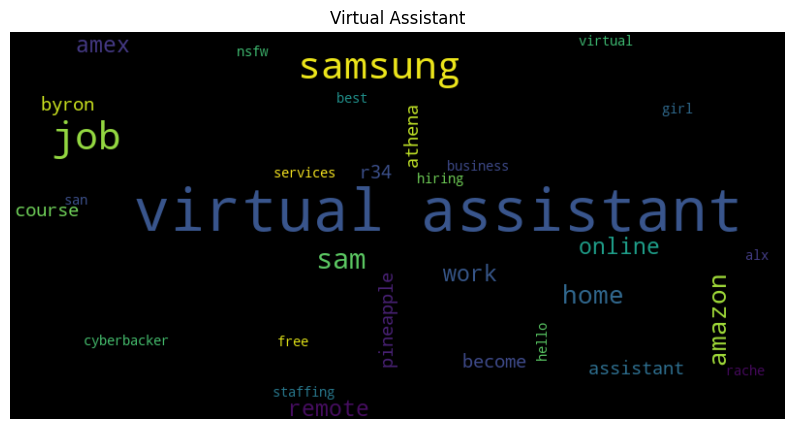

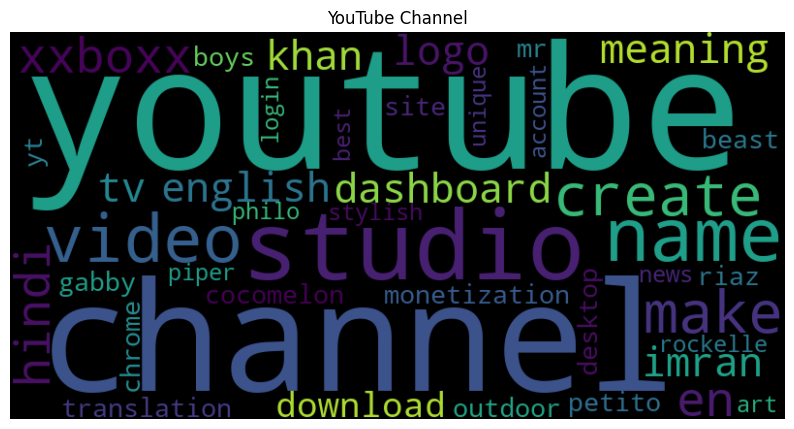

In [33]:
for hustle in side_hustles:
    show_wordcloud(hustle)